<a href="https://colab.research.google.com/github/HITesh-20/Spark_Foundation/blob/master/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2**- 
# To Explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

# **1.IMPORTING LIBRARIES**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# **2.READ DATA SET**

In [109]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [110]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [111]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [112]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [113]:
df.shape

(25, 2)

**DESCRIBBE**

In [114]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**INFO**

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# **3.HANDLING MISSING VALUES**

In [116]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# **4.UNIVARIATE ANALYSIS**

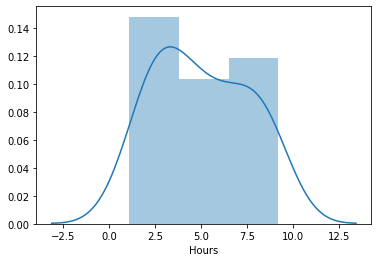

In [117]:
sns.distplot(df['Hours'],kde=True)

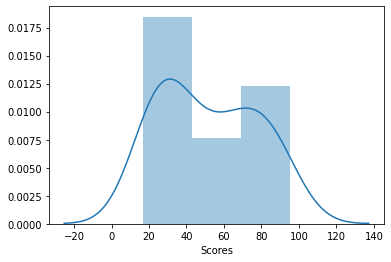

In [118]:
sns.distplot(df['Scores'],kde=True)

# **5.BIVARIATE ANALYSIS**

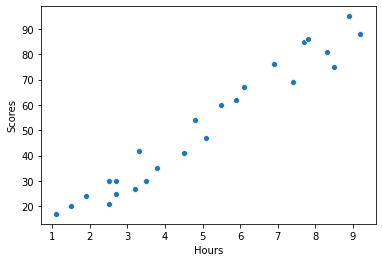

In [119]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])

**MULTIVARIATE**

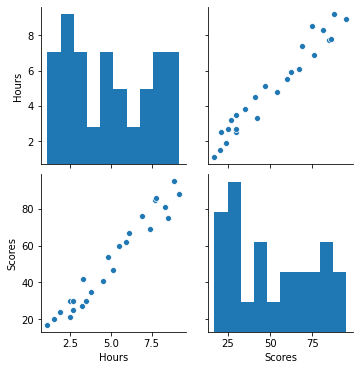

In [120]:
sns.pairplot(df,palette='coolwarm')

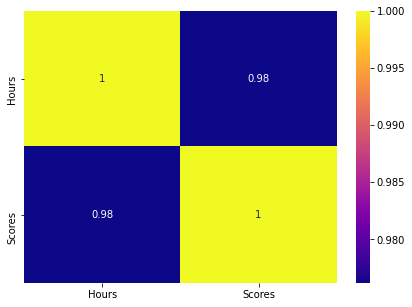

In [121]:
fig,ax=plt.subplots(figsize=(7,5))
sns.heatmap(df.corr(),cmap='plasma',annot=True)

# **6. FEATURING**

In [122]:
x=df.drop('Scores',axis='columns')
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [123]:
y=df.drop('Hours',axis='columns')
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


# **7. SPLITTING DATASET**

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)
print("Shape of x_train:",x_train.shape,"\nShape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape,"\nShape of y_test:",y_test.shape)

Shape of x_train: (15, 1) 
Shape of x_test: (10, 1)
Shape of y_train: (15, 1) 
Shape of y_test: (10, 1)


**LOOKING FOR OUTLIERS**

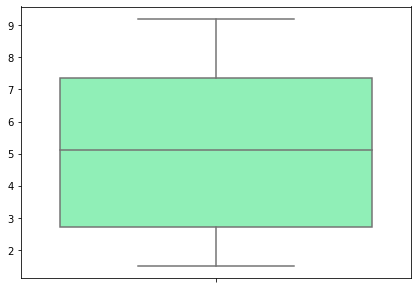

In [125]:
fig,axes=plt.subplots(figsize=(7,5))
sns.boxplot(x_train,orient="vertical",palette="rainbow",ax=axes)

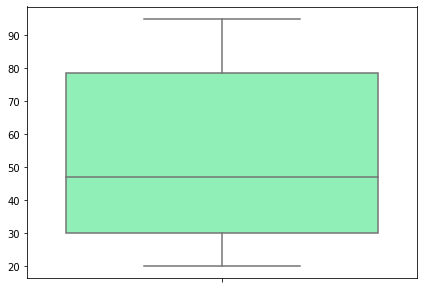

In [126]:
fig,axes=plt.subplots(figsize=(7,5))
sns.boxplot(y_train,orient="vertical",palette="rainbow",ax=axes)

# **8. SIMPLE LINEAR REGRESSION**

In [127]:
model1=LinearRegression().fit(x_train,y_train)
pred=model1.predict(x_test)
print(pred)

[[11.37435315]
 [33.85471769]
 [19.54903116]
 [86.99012477]
 [49.18223896]
 [78.81544676]
 [62.46609073]
 [75.7499425 ]
 [35.89838719]
 [32.83288293]]


# **9. EVALUATION**

In [128]:
print('Slope:',model1.coef_) 
print('Intercept:',model1.intercept_)  
print('R2 score:',metrics.r2_score(y_test,pred))
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(y_test,pred))
print("MEAN SQUARED ERROR:",metrics.mean_squared_error(y_test,pred))
print("ROOT MEAN SQUARED ERROR:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

Slope: [[10.21834752]]
Intercept: [0.13417088]
R2 score: 0.9130017450458736
MEAN ABSOLUTE ERROR: 6.422945894664219
MEAN SQUARED ERROR: 45.7958814078521
ROOT MEAN SQUARED ERROR: 6.767265430574753


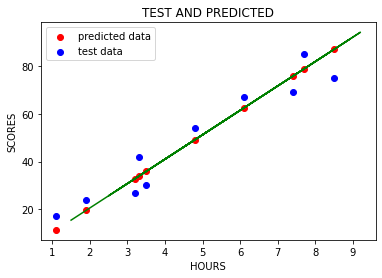

In [129]:
plt.scatter(x_test,pred,color='red',label='predicted data')
plt.scatter(x_test,y_test,color='blue',label='test data')
plt.plot(x_train,model1.predict(x_train),color='green')
plt.legend()
plt.xlabel("HOURS")
plt.ylabel("SCORES")
plt.title("TEST AND PREDICTED")
plt.show()

# **10. PREDICTION**

What will be predicted score if a student study for 9.25 hrs in a
day?

In [130]:
result=model1.predict([[9.25]])
print(result)

[[94.65388541]]
